In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##data downloaded from github 

# Part 1-Predicting Region

In [220]:
#There was a column without any name and was not making any sence so removed it
df=pd.read_csv("https://raw.githubusercontent.com/ajeetsingh55555/pythonfiles/main/avocadosaved.csv")

checking the column names

In [221]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [30]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015/12/27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015/12/20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015/12/13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015/12/06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015/11/29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018/02/04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018/01/28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018/01/21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018/01/14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


checking the null values using heatmap, so to check this in values we will use below command

<AxesSubplot:>

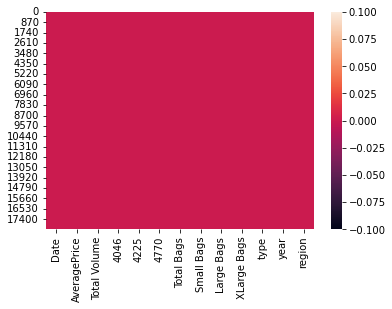

In [31]:
sns.heatmap(df.isnull())

# checking the count of null values

In [32]:
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# we will require encoding to convert oject into float which we will do later

In [33]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [34]:
df.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Here we will replace NULL values with Mean or Mode
some of the column have float values i.e. latitude,logitude,commissioning_year,year_of_capacity_data however we will go with replacing with NULL with Mode due to the charactristic of these columns and for rest we will use Mean

Now checking the null value status

<AxesSubplot:>

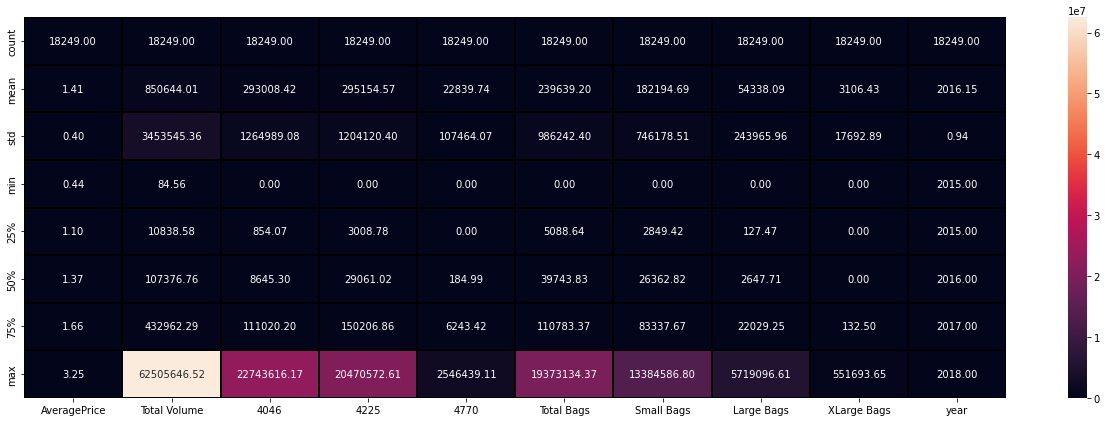

In [35]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [36]:
df.shape
#data has 13 columns and 18249 rows

(18249, 13)

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [222]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [223]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [224]:
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
dtype: object

Above we have replaced null values and then converted all float to string, now we will check correlation and individual column data distribution

In [225]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


<AxesSubplot:>

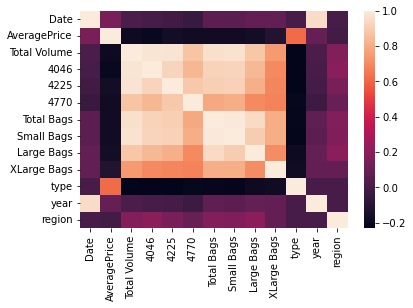

In [41]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [42]:
dfcorr["region"].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
Date           -0.000101
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

From the above checks using correlation , we do not need "year","AveragePrice","Date","XLarge Bags","4770","type" are very low correlated with our output , so we will drop all of them to make the data claeaner



In [131]:
df1=df.drop(["year","AveragePrice","Date","XLarge Bags","4770","type"],axis=1)
df1

,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,region
0,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,0.0
1,54876.98,674.28,44638.81,9505.56,9408.07,97.49,0.0
2,118220.22,794.70,109149.67,8145.35,8042.21,103.14,0.0
3,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,0.0
4,51039.60,941.48,43838.39,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,13498.67,13066.82,431.85,53.0
18245,13888.04,1191.70,3431.50,9264.84,8940.04,324.80,53.0
18246,13766.76,1191.92,2452.79,9394.11,9351.80,42.31,53.0
18247,16205.22,1527.63,2981.04,10969.54,10919.54,50.00,53.0


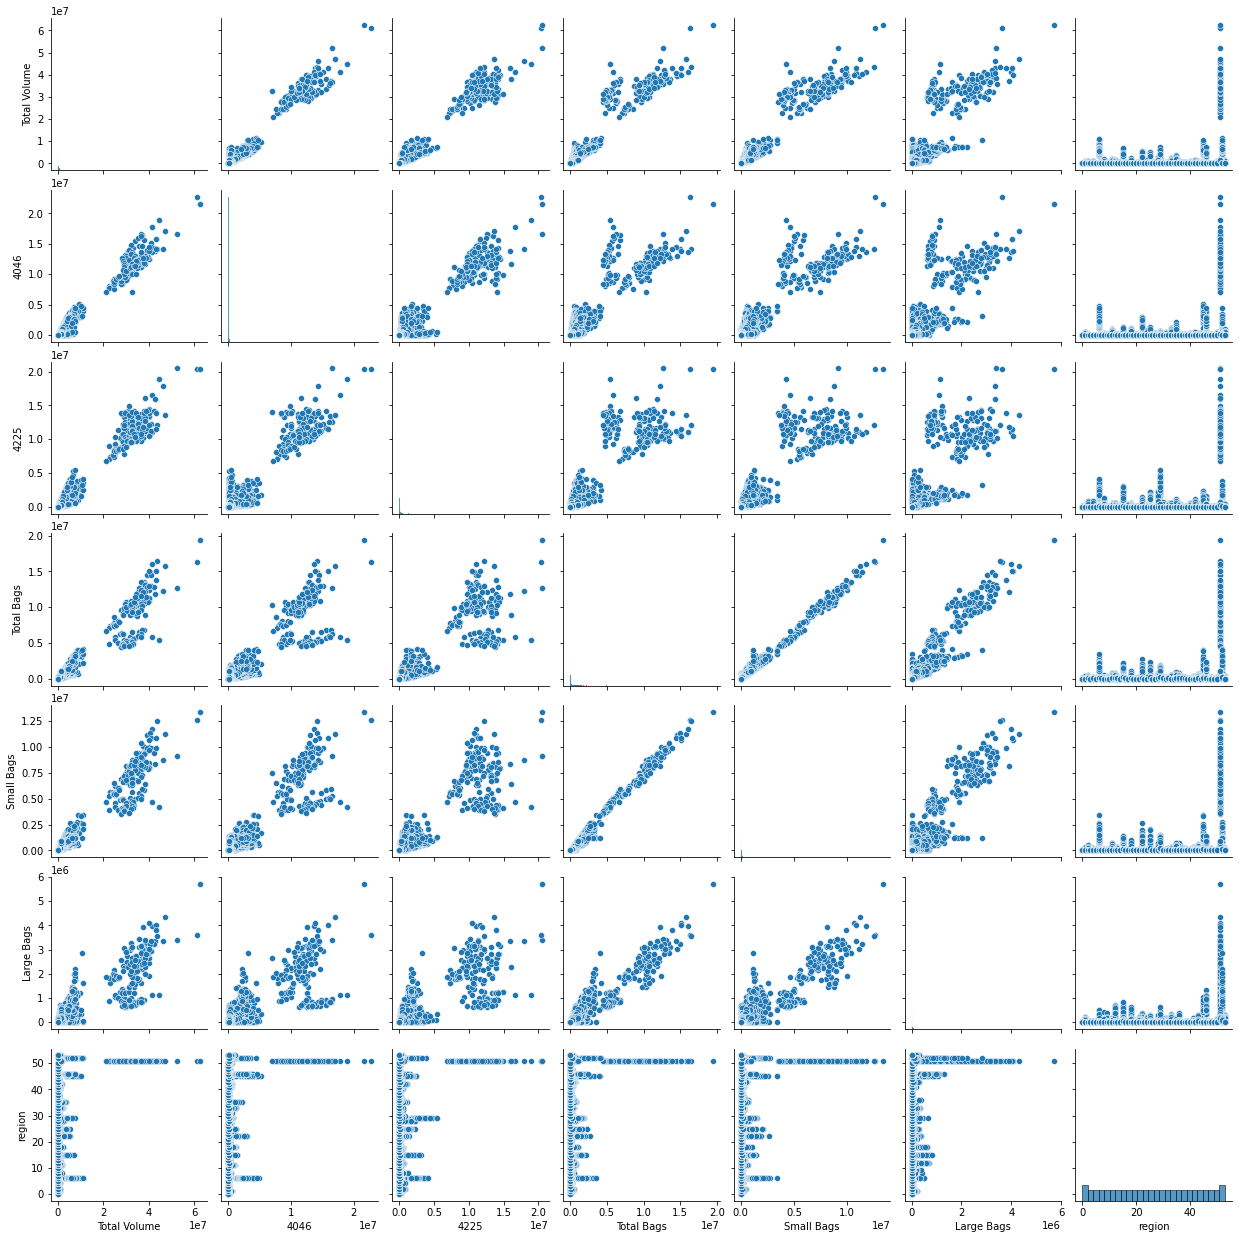

In [92]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

In [93]:
df1.columns

Index(['Total Volume', '4046', '4225', 'Total Bags', 'Small Bags',
       'Large Bags', 'region'],
      dtype='object')

In [ ]:
#we will check the data distribution using distplots
sns.distplot(df1['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

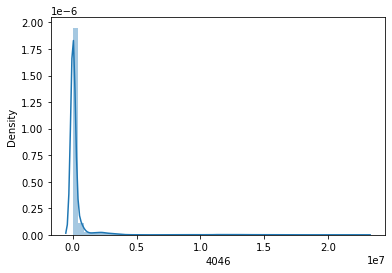

In [46]:
sns.distplot(df1['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

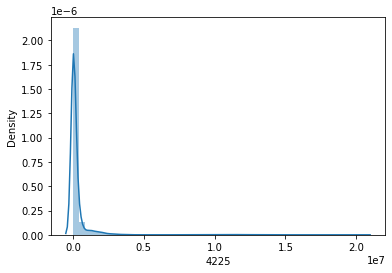

In [47]:
sns.distplot(df1['4225'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

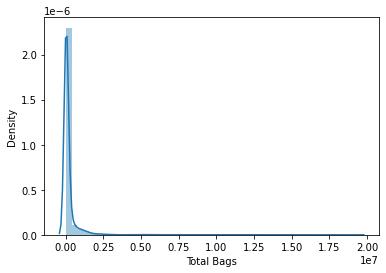

In [48]:
sns.distplot(df1['Total Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

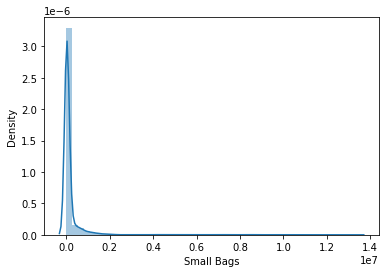

In [49]:
sns.distplot(df1['Small Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

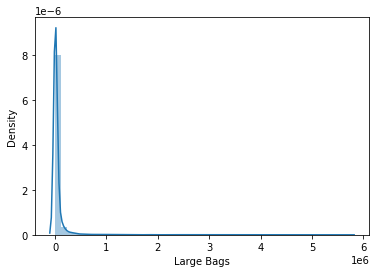

In [50]:
sns.distplot(df1['Large Bags'])

<AxesSubplot:xlabel='region', ylabel='Density'>

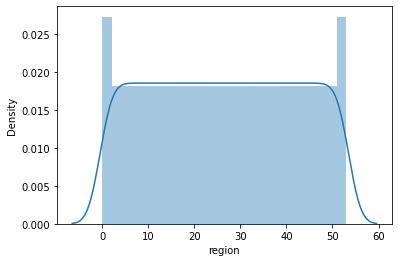

In [52]:
sns.distplot(df1['region'])

Total Volume       AxesSubplot(0.125,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Total Bags      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Small Bags      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Large Bags      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
region                AxesSubplot(0.125,0.125;0.110714x0.343182)
dtype: object

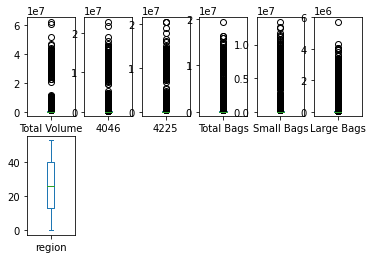

In [94]:
df1.plot(kind='box',subplots=True,layout=(2,6))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

As we have outliers in the data so we need to remove outliers first

In [95]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,region
0,0.227716,0.230816,0.199902,0.234170,0.232647,0.222352,1.700252
1,0.230427,0.231103,0.208054,0.233350,0.231568,0.222335,1.700252
2,0.212085,0.231007,0.154478,0.234730,0.233399,0.222311,1.700252
3,0.223444,0.230741,0.185350,0.237096,0.236568,0.222186,1.700252
4,0.231538,0.230891,0.208719,0.236718,0.236154,0.221924,1.700252
...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.229301,0.226665,0.220964,1.700811
18245,0.242296,0.230693,0.242277,0.233594,0.232196,0.221403,1.700811
18246,0.242331,0.230693,0.243090,0.233463,0.231644,0.222561,1.700811
18247,0.241625,0.230428,0.242651,0.231866,0.229543,0.222529,1.700811


In [96]:
z=np.abs(zscore(df1))

In [97]:
z.shape

(18249, 7)

In [98]:
threshold=3
print(np.where(z>3))

(array([ 346,  359, 1516, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 2, ..., 5, 5, 5], dtype=int64))


In [99]:
len(np.where(z>3)[0])

1149

In [132]:
df2=df1[(z<3).all(axis=1)]

In [73]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (18249, 8)
new dataframe (17954, 8)
total dropped 295


In [74]:
loss_percent=(18249-17954)/18249*100
print(loss_percent,"%")
#here by removing the outliers loosign 1.6% of data which is fine as it will help in gettign better model accuracy

1.616526932982629 %


In [133]:
#we will now check skewness in data
df2.skew()

Total Volume    3.574731
4046            4.635038
4225            4.129553
Total Bags      3.871923
Small Bags      4.105150
Large Bags      4.812358
region          0.011333
dtype: float64

In [134]:
# We will break data into input and output and then remove skewness
x=df2.drop("region",axis=1)
y=df2["region"]

In [103]:
x

,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags
0,64236.62,1036.74,54454.85,8696.87,8603.62,93.25
1,54876.98,674.28,44638.81,9505.56,9408.07,97.49
2,118220.22,794.70,109149.67,8145.35,8042.21,103.14
3,78992.15,1132.00,71976.41,5811.16,5677.40,133.76
4,51039.60,941.48,43838.39,6183.95,5986.26,197.69
...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,13498.67,13066.82,431.85
18245,13888.04,1191.70,3431.50,9264.84,8940.04,324.80
18246,13766.76,1191.92,2452.79,9394.11,9351.80,42.31
18247,16205.22,1527.63,2981.04,10969.54,10919.54,50.00


In [104]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 17954, dtype: float64

In [135]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


,Variables,VIF Factor
0,Total Volume,1348.325154
1,4046,243.097103
2,4225,220.447805
3,Total Bags,4050.713746
4,Small Bags,2360.134346
5,Large Bags,198.851570


We will drop 4225 as it may cause multicolliniearity problem with 4046

In [157]:
#x1=x.drop("4225",axis=1)
#x1

In [158]:
x

,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags
0,64236.62,1036.74,54454.85,8696.87,8603.62,93.25
1,54876.98,674.28,44638.81,9505.56,9408.07,97.49
2,118220.22,794.70,109149.67,8145.35,8042.21,103.14
3,78992.15,1132.00,71976.41,5811.16,5677.40,133.76
4,51039.60,941.48,43838.39,6183.95,5986.26,197.69
...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,13498.67,13066.82,431.85
18245,13888.04,1191.70,3431.50,9264.84,8940.04,324.80
18246,13766.76,1191.92,2452.79,9394.11,9351.80,42.31
18247,16205.22,1527.63,2981.04,10969.54,10919.54,50.00


In [107]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [159]:
xn=power_transform(x,method='yeo-johnson')
pd.DataFrame(xn).skew()

0   -0.004615
1   -0.037718
2   -0.042270
3   -0.019936
4   -0.022565
5   -0.109787
dtype: float64

<AxesSubplot:xlabel='region', ylabel='count'>

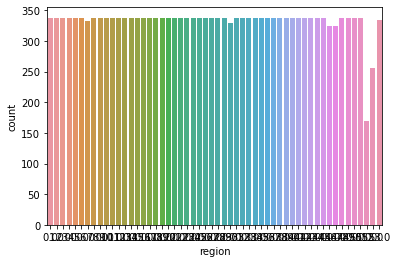

In [138]:
sns.countplot(y)

As this is classification problem and we can see imbalance data so will use Smote technique to balance the data

In [139]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [160]:
smt=SMOTE()
xn2,y1=smt.fit_resample(xn,y)

<AxesSubplot:xlabel='region', ylabel='count'>

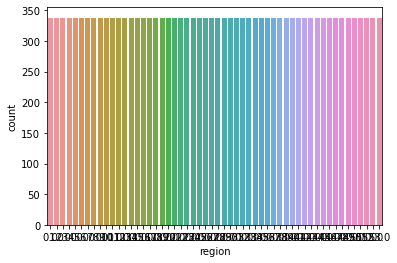

In [154]:
sns.countplot(y1)

In [162]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
xn2=st.fit_transform(xn2)
xn2

array([[-0.09671708, -0.67306163,  0.32091713, -0.551545  , -0.36301884,
        -0.79885322],
       [-0.16774486, -0.79206279,  0.24048759, -0.51305669, -0.32775203,
        -0.78903063],
       [ 0.1790872 , -0.7469307 ,  0.61287806, -0.5797636 , -0.38943884,
        -0.77652425],
       ...,
       [ 1.18348236,  1.44469897,  0.52253453,  1.26773204,  0.98246603,
         1.6320324 ],
       [ 1.10344902,  1.42447346,  0.71098322,  0.82943501,  0.69994056,
         1.1499734 ],
       [-1.1409555 , -0.58609098, -0.77281441, -1.1246643 , -0.88055664,
        -0.88109471]])

Now we have our input and output ready to be tested for model , this is a classification problem so will go with Multinomial Naive Bayes first

In [163]:
#finding best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    xn2_train,xn2_test,y1_train,y1_test=train_test_split(xn2,y1,test_size=.20,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(xn2_train,y1_train)
    predrf=rf.predict(xn2_test)
    acc=accuracy_score(y1_test,predrf)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

accuracy 0.7688304574089291 random_state 1
accuracy 0.7691043549712407 random_state 2
accuracy 0.7759517940290331 random_state 3
accuracy 0.7784168720898385 random_state 4
accuracy 0.7764995891536566 random_state 5
accuracy 0.7729389208436045 random_state 6
accuracy 0.7745823062174747 random_state 7
accuracy 0.7691043549712407 random_state 8
accuracy 0.770747740345111 random_state 9
accuracy 0.7767734867159682 random_state 10
accuracy 0.7660914817858121 random_state 11
accuracy 0.7682826622843056 random_state 12
accuracy 0.7691043549712407 random_state 13
accuracy 0.7619830183511367 random_state 14
accuracy 0.7674609695973705 random_state 15
accuracy 0.7633525061626951 random_state 16
accuracy 0.7647219939742537 random_state 17
accuracy 0.7669131744727472 random_state 18
accuracy 0.7685565598466174 random_state 19
accuracy 0.7844426184606957 random_state 20
accuracy 0.7660914817858121 random_state 21
accuracy 0.7732128184059162 random_state 22
accuracy 0.7704738427827992 random_state 2

accuracy 0.7649958915365653 random_state 186
accuracy 0.7674609695973705 random_state 187
accuracy 0.7622569159134484 random_state 188
accuracy 0.7688304574089291 random_state 189
accuracy 0.7639003012873186 random_state 190
accuracy 0.7693782525335524 random_state 191
accuracy 0.7754039989044097 random_state 192
accuracy 0.772391125718981 random_state 193
accuracy 0.7682826622843056 random_state 194
accuracy 0.7636264037250069 random_state 195
accuracy 0.7792385647767734 random_state 196
accuracy 0.7756778964667215 random_state 197
accuracy 0.7743084086551629 random_state 198
accuracy 0.7748562037797864 random_state 199
Best Accuracy is 0.790468364831553 on Random State 181


In [164]:
#We will use random state 181
rfs=RandomForestClassifier(n_estimators=100,random_state=181)
rfs.fit(xn2_train,y1_train)
predrf=rfs.predict(xn2_test)
print(accuracy_score(y1_test,predrf))
print(confusion_matrix(y1_test,predrf))
print(classification_report(y1_test,predrf))
cvscore=cross_val_score(rfs,xn2,y1,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.7797863599013969
[[43  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 53 ...  0  0  2]
 ...
 [ 0  0  0 ... 69  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  4  0 ...  0  0 44]]
              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71        58
         1.0       0.76      0.69      0.72        68
         2.0       0.87      0.74      0.80        72
         3.0       0.87      0.81      0.84        74
         4.0       0.80      0.95      0.87        58
         5.0       0.81      0.58      0.68        67
         6.0       0.86      0.96      0.91        71
         7.0       0.80      0.81      0.80        68
         8.0       0.98      0.90      0.94        63
         9.0       0.84      0.83      0.84        78
        10.0       0.61      0.70      0.65        60
        11.0       0.81      0.91      0.86        70
        12.0       0.86      0.79      0.82        70
        13.0       0.75      0.81      0.78        69
        14.0  

In [165]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xn2_train,y1_train)
knn.score(xn2_train,y1_train)
predknn=knn.predict(xn2_test)
print(accuracy_score(y1_test,predknn))
print(confusion_matrix(y1_test,predknn))
print(classification_report(y1_test,predknn))
cvscore1=cross_val_score(knn,xn2,y1,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.7422623938646946
[[45  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 56 ...  0  0  0]
 ...
 [ 0  0  0 ... 69  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  3  1 ...  0  0 41]]
              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72        58
         1.0       0.75      0.75      0.75        68
         2.0       0.74      0.78      0.76        72
         3.0       0.79      0.78      0.79        74
         4.0       0.72      0.86      0.79        58
         5.0       0.79      0.51      0.62        67
         6.0       0.76      0.89      0.82        71
         7.0       0.63      0.82      0.71        68
         8.0       0.92      0.86      0.89        63
         9.0       0.79      0.79      0.79        78
        10.0       0.51      0.70      0.59        60
        11.0       0.71      0.89      0.79        70
        12.0       0.83      0.77      0.80        70
        13.0       0.74      0.72      0.73        69
        14.0  

In [167]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(xn2_train,y1_train)
svc.score(xn2_train,y1_train)
predsvc=svc.predict(xn2_test)
print(accuracy_score(y1_test,predsvc))
print(confusion_matrix(y1_test,predsvc))
print(classification_report(y1_test,predsvc))
cvscore2=cross_val_score(svc,xn2,y1,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.6288688030676527
[[47  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 48 ...  0  0  2]
 ...
 [ 0  0  0 ... 69  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  5  0 ...  0  0 34]]
              precision    recall  f1-score   support

         0.0       0.56      0.81      0.66        58
         1.0       0.51      0.53      0.52        68
         2.0       0.68      0.67      0.67        72
         3.0       0.69      0.65      0.67        74
         4.0       0.67      0.81      0.73        58
         5.0       0.68      0.39      0.50        67
         6.0       0.75      0.76      0.76        71
         7.0       0.48      0.56      0.52        68
         8.0       0.85      0.83      0.84        63
         9.0       0.67      0.69      0.68        78
        10.0       0.35      0.62      0.45        60
        11.0       0.72      0.83      0.77        70
        12.0       0.80      0.56      0.66        70
        13.0       0.52      0.54      0.53        69
        14.0  

In [168]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xn2_train,y1_train)
dtc.score(xn2_train,y1_train)
preddtc=dtc.predict(xn2_test)
print(accuracy_score(y1_test,preddtc))
print(confusion_matrix(y1_test,preddtc))
print(classification_report(y1_test,preddtc))
cvscore3=cross_val_score(dtc,xn2,y1,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.6579019446726924
[[36  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  1]
 [ 0  2 49 ...  0  0  2]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  3  0 ...  0  0 35]]
              precision    recall  f1-score   support

         0.0       0.54      0.62      0.58        58
         1.0       0.62      0.59      0.60        68
         2.0       0.83      0.68      0.75        72
         3.0       0.74      0.70      0.72        74
         4.0       0.77      0.93      0.84        58
         5.0       0.57      0.48      0.52        67
         6.0       0.80      0.86      0.83        71
         7.0       0.58      0.65      0.61        68
         8.0       0.86      0.86      0.86        63
         9.0       0.69      0.68      0.68        78
        10.0       0.44      0.45      0.44        60
        11.0       0.71      0.79      0.74        70
        12.0       0.78      0.64      0.70        70
        13.0       0.63      0.54      0.58        69
        14.0  

In [169]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(xn2_train,y1_train)
ad_pred=ad.predict(xn2_test)
print(accuracy_score(y1_test,ad_pred))
print(confusion_matrix(y1_test,ad_pred))
print(classification_report(y1_test,ad_pred))
cvscore4=cross_val_score(ad,xn2,y1,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.059709668583949604
[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.15      0.03      0.06        58
         1.0       0.00      0.00      0.00        68
         2.0       0.00      0.00      0.00        72
         3.0       0.00      0.00      0.00        74
         4.0       0.00      0.00      0.00        58
         5.0       0.00      0.00      0.00        67
         6.0       0.00      0.00      0.00        71
         7.0       0.00      0.00      0.00        68
         8.0       0.00      0.00      0.00        63
         9.0       0.00      0.00      0.00        78
        10.0       0.03      1.00      0.05        60
        11.0       0.00      0.00      0.00        70
        12.0       0.00      0.00      0.00        70
        13.0       0.00      0.00      0.00        69
        14.0       0.00      0.00      0.00     

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xn2_train,y1_train)
gb_pred=gb.predict(xn2_test)
print(accuracy_score(y1_test,gb_pred))
print(confusion_matrix(y1_test,gb_pred))
print(classification_report(y1_test,gb_pred))
cvscore5=cross_val_score(gb,xn2,y1,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.6948781155847713
[[41  0  0 ...  0  0  0]
 [ 0 35  1 ...  0  0  1]
 [ 0  0 48 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  1]
 [ 0  0  0 ...  0 58  0]
 [ 0  3  0 ...  0  0 39]]
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70        58
         1.0       0.64      0.51      0.57        68
         2.0       0.77      0.67      0.72        72
         3.0       0.80      0.65      0.72        74
         4.0       0.78      0.88      0.83        58
         5.0       0.79      0.55      0.65        67
         6.0       0.81      0.92      0.86        71
         7.0       0.63      0.75      0.68        68
         8.0       0.89      0.89      0.89        63
         9.0       0.82      0.77      0.79        78
        10.0       0.48      0.60      0.53        60
        11.0       0.74      0.80      0.77        70
        12.0       0.70      0.67      0.69        70
        13.0       0.65      0.74      0.69        69
        14.0  

KeyboardInterrupt: 

Hypertuning below for the algorithm selected as Random Forest Classifier

In [172]:
RandomForestClassifier()

RandomForestClassifier()

In [173]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [174]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(xn2_train,y1_train)
GCV.best_params_

{'criterion': 'gini', 'max_features': 'log2'}

In [175]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [176]:
GCV.best_estimator_

RandomForestClassifier(max_features='log2')

In [177]:
GCV_pred=GCV.best_estimator_.predict(xn2_test)
accuracy_score(y1_test,GCV_pred)
print(accuracy_score(y1_test,GCV_pred))
print(confusion_matrix(y1_test,GCV_pred))
print(classification_report(y1_test,GCV_pred))
cvscore6=cross_val_score(GCV.best_estimator_,xn2,y1,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.7743084086551629
[[43  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  1]
 [ 0  0 54 ...  0  0  2]
 ...
 [ 0  0  0 ... 69  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  3  0 ...  0  0 45]]
              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70        58
         1.0       0.75      0.68      0.71        68
         2.0       0.87      0.75      0.81        72
         3.0       0.84      0.77      0.80        74
         4.0       0.80      0.95      0.87        58
         5.0       0.76      0.61      0.68        67
         6.0       0.88      0.93      0.90        71
         7.0       0.84      0.79      0.82        68
         8.0       0.97      0.90      0.93        63
         9.0       0.84      0.83      0.84        78
        10.0       0.64      0.72      0.68        60
        11.0       0.79      0.91      0.85        70
        12.0       0.84      0.73      0.78        70
        13.0       0.78      0.83      0.80        69
        14.0  

RandomForestClassifier 77% accuracy score ,78 % accuracy in F1 score and 52 % Cross Val score

KNeighborsClassifier 74 % accuracy , 74 % accuracy in F1 score and 50 % Cross Val score

support vector classifier using kernel as poly 62 % accuracy , 63 % accuracy in F1 score and 47 % Cross Val score

DecisionTreeClassifier 65% accuracy , 66 % accuracy in F1 score and 44 % Cross Val score

AdaBoostClassifier 52 % accuracy , 53 % accuracy in F1 score and 51 % Cross Val score

By doing RandomForestClassifier with best param 77 % accuracy , 77 % accuracy in F1 score and 51 % Cross Val score

We select Random Forest Classifier which has 77% accuracy score ,78 % accuracy in F1 score and 52 % Cross Val score as final model

Not able to plot AUC Roc curve due to muticlass output as this works for Binary models

In [179]:
#we will save this model
import pickle

In [181]:
filename='Avocadoregion.pkl'
pickle.dump(rfs,open(filename,'wb'))

In [183]:
#Conclusion 
loaded_model=pickle.load(open('Avocadoregion.pkl','rb'))
result=loaded_model.score(xn2_test,y1_test)
print(result)
                        

0.7797863599013969


In [184]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(xn2_test)[:],predrf[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Predicted,53.0,26.0,43.0,37.0,38.0,7.0,53.0,36.0,5.0,1.0,...,24.0,1.0,41.0,46.0,44.0,39.0,28.0,7.0,37.0,17.0
Original,53.0,26.0,43.0,37.0,38.0,7.0,53.0,36.0,5.0,1.0,...,24.0,1.0,41.0,46.0,44.0,39.0,28.0,7.0,37.0,17.0


# Part 1-Predicting Avg Price

In the begining we had checked distribution charts and will not repeat them however we will check for corelation of avg price with other first to decide which are to be dropped now


In [185]:

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [186]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [187]:
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
dtype: object

Above tells all datatypes are float or int and
Our target is AveragePrice which is a continues variable 

In [226]:
#as we will predict capacity_mw so need to check its correlation with other data columns
dfcorr["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
type            0.615845
Date            0.145514
year            0.093197
region         -0.011716
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


From the above checks using correlation , we do not need year,region due to very low correlation

hence we will drop year,region  from the data


In [227]:
df1=df.drop(["year","region"],axis=1)
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0


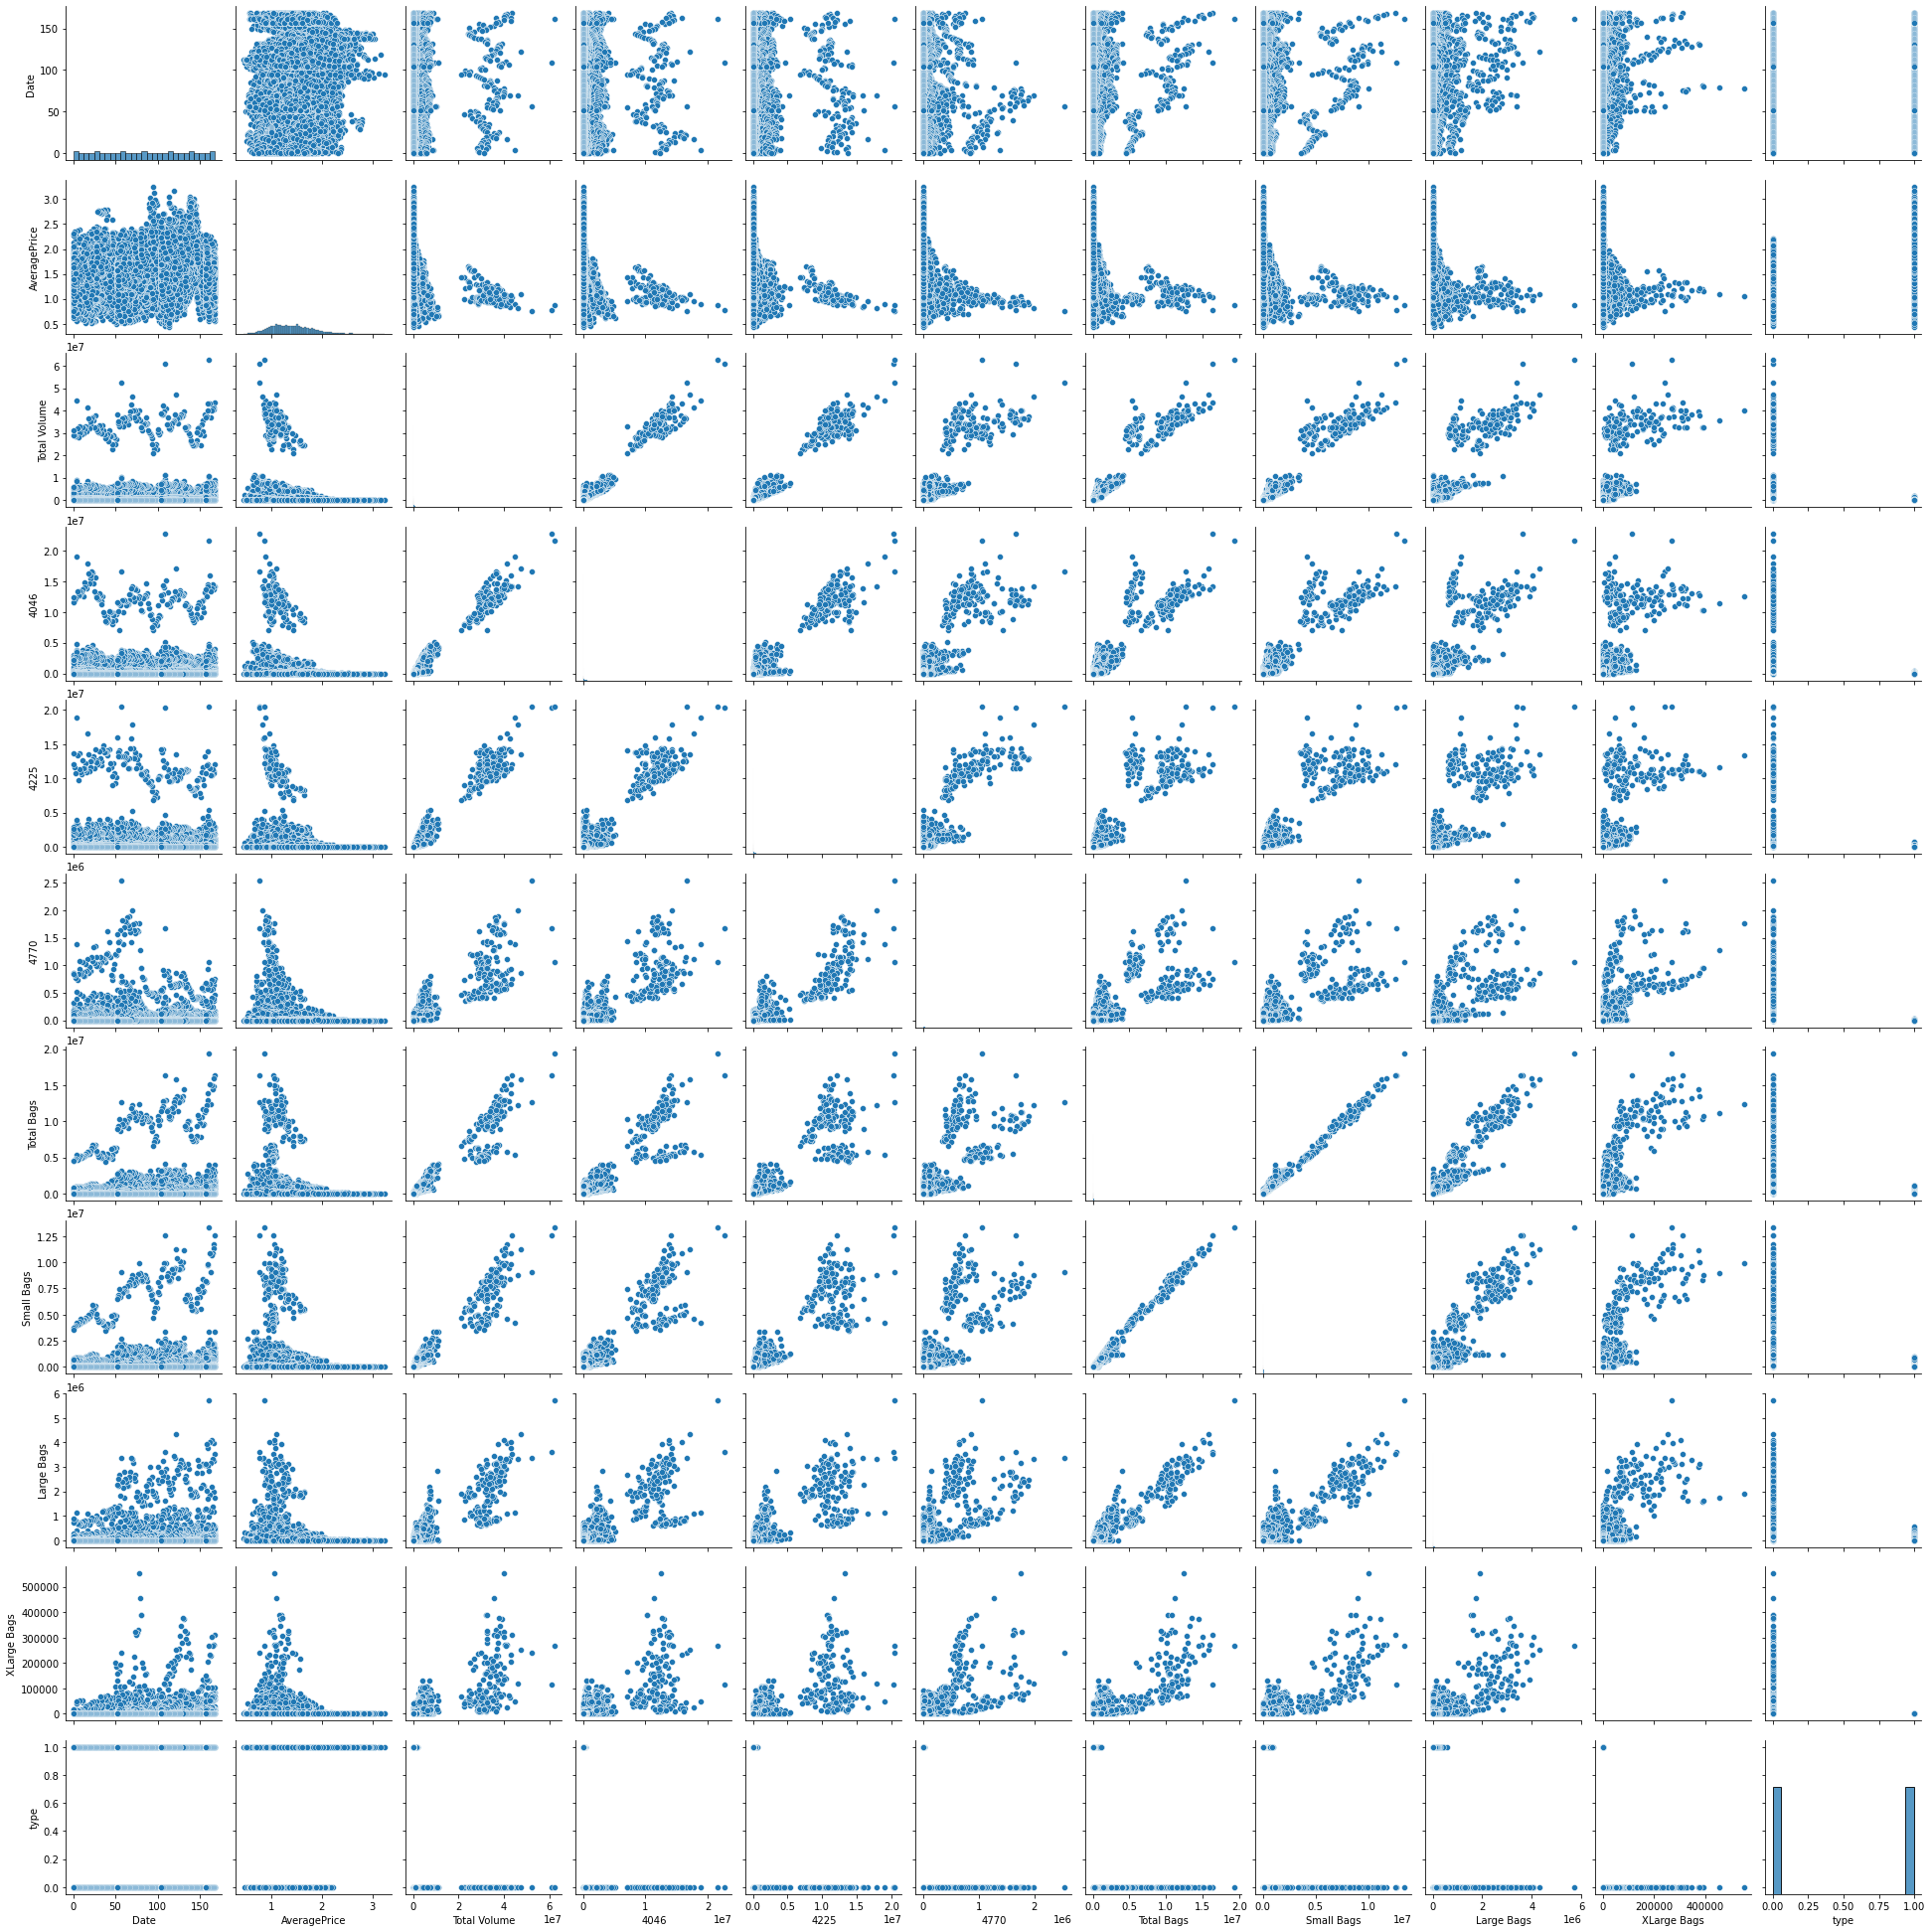

In [190]:
#Drawing a pairplot to view the correlation
sns.pairplot(df1)

In [191]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

we had already seen in distribution plot and box plot in part 1 that data has outliers which are to be removed hence i will not repeat few EDA steps which had been done earlier

We will remove outliers using z score method

In [228]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,0.676360,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558,0.999836
1,0.696857,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558,0.999836
2,0.717355,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558,0.999836
3,0.737853,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558,0.999836
4,0.758350,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558,0.999836
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558,1.000164
18245,1.557874,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558,1.000164
18246,1.537376,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558,1.000164
18247,1.516879,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558,1.000164


In [229]:
z=np.abs(zscore(df1))

In [230]:
z.shape

(18249, 11)

In [231]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [232]:
len(np.where(z>3)[0])

1773

In [233]:
df2=df1[(z<3).all(axis=1)]

In [234]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (18249, 11)
new dataframe (17651, 11)
total dropped 598


In [235]:
loss_percent=(18249-17651)/18249*100
print(loss_percent,"%")
#here by removing the outliers loosign 3.2% of data which is fine as it will help in gettign better model accuracy

3.276891884486821 %


In [236]:
#we will now check skewness in data
df2.skew()

Date            0.013714
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
dtype: float64

In [237]:
# We will break data into input and output and then remove skewness
x=df2.drop("AveragePrice",axis=1)
y=df2["AveragePrice"]


In [202]:
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,51.0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0
1,50.0,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0
2,49.0,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0
3,48.0,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0
4,47.0,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,161.0,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0
18245,160.0,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0
18246,159.0,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0
18247,158.0,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0


In [203]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [238]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)

,Variables,VIF Factor
0,Date,2.119627e+00
1,Total Volume,4.976827e+08
2,4046,8.726670e+07
3,4225,7.503480e+07
4,4770,5.280799e+05
5,Total Bags,2.333471e+13
6,Small Bags,1.518921e+13
7,Large Bags,1.478286e+12
8,XLarge Bags,7.092277e+09
9,type,1.758903e+00


We will drop Date , Type , 4225 and Large Bags from the above as the VIF is close to primary_fuel to remove multicolliniarity

In [239]:
x1=x.drop(["Date","type","Large Bags","4225"],axis=1)
x1

,Total Volume,4046,4770,Total Bags,Small Bags,XLarge Bags
0,64236.62,1036.74,48.16,8696.87,8603.62,0.0
1,54876.98,674.28,58.33,9505.56,9408.07,0.0
2,118220.22,794.70,130.50,8145.35,8042.21,0.0
3,78992.15,1132.00,72.58,5811.16,5677.40,0.0
4,51039.60,941.48,75.78,6183.95,5986.26,0.0
...,...,...,...,...,...,...
18244,17074.83,2046.96,0.00,13498.67,13066.82,0.0
18245,13888.04,1191.70,0.00,9264.84,8940.04,0.0
18246,13766.76,1191.92,727.94,9394.11,9351.80,0.0
18247,16205.22,1527.63,727.01,10969.54,10919.54,0.0


In [240]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [241]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.008642
1   -0.039282
2    0.024168
3   -0.022204
4   -0.024405
5    0.853758
dtype: float64

In [242]:
#using Min Max Scaling technique
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
xf=st.fit_transform(x2)
xf

array([[0.55893336, 0.35498056, 0.32276192, 0.48769187, 0.43662031,
        0.        ],
       [0.54510426, 0.32886287, 0.3379449 , 0.49414128, 0.44327957,
        0.        ],
       [0.61275241, 0.33876453, 0.40181167, 0.4829649 , 0.43163359,
        0.        ],
       ...,
       [0.42481659, 0.36358503, 0.53708023, 0.49328351, 0.44283071,
        0.        ],
       [0.43889538, 0.37905957, 0.53698048, 0.50461533, 0.45451669,
        0.        ],
       [0.44548987, 0.41991611, 0.44473608, 0.51132047, 0.46164716,
        0.        ]])

As the output is a continues variable we will use Linear Regression technique and to do that we will find the best random state to apply

In [243]:
from sklearn.metrics import r2_score
maxr2=0
maxRS=0
lr=LinearRegression()
for i in range(0,100):
    xf_train,xf_test,y_train,y_test=train_test_split(xf,y,test_size=0.2,random_state=i)
    lr.fit(xf_train,y_train)
    predlr=lr.predict(xf_test)
    r2score=r2_score(y_test,predlr)
    print('r2score',r2score,'randome state',i)
    if r2score>maxr2:
        maxr2=r2score
        maxRS=i
        
print("Best r2 score is",maxr2,"on Random State",maxRS)

r2score 0.3756543037382124 randome state 0
r2score 0.3858109811610394 randome state 1
r2score 0.37055956547820945 randome state 2
r2score 0.38931796773139804 randome state 3
r2score 0.38716862520203854 randome state 4
r2score 0.3983563337503291 randome state 5
r2score 0.39398464214204143 randome state 6
r2score 0.38042741340506336 randome state 7
r2score 0.38856185717313607 randome state 8
r2score 0.3884668036944068 randome state 9
r2score 0.3700921612907946 randome state 10
r2score 0.38220733903696025 randome state 11
r2score 0.3691353182573208 randome state 12
r2score 0.3682810337097253 randome state 13
r2score 0.38141155749974087 randome state 14
r2score 0.3692801137487981 randome state 15
r2score 0.36601807546346465 randome state 16
r2score 0.38797316790391756 randome state 17
r2score 0.38214286761882077 randome state 18
r2score 0.3886719985579957 randome state 19
r2score 0.384478821920723 randome state 20
r2score 0.37585877475186824 randome state 21
r2score 0.36651198374492955 ran

In [244]:
#using random state 80 in Linear Regression model
xf_train,xf_test,y_train,y_test=train_test_split(xf,y,test_size=0.2,random_state=60)
lr.fit(xf_train,y_train)
predlr=lr.predict(xf_test)
print(r2_score(y_test,predlr))
cvscore=cross_val_score(lr,xf,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.4061613111060761
cross val score: -0.31662162554965645


********Tuning the parameters

In [245]:
#Hypertuning , getting best parameters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(xf_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [246]:
#applying the same parameters
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(xf_train,y_train)
ls.score(xf_train,y_train)
pred_ls=ls.predict(xf_test)
print(r2_score(y_test,pred_ls))
cvscore1=cross_val_score(ls,xf,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.40549677629617675
cross val score: -0.3039693951899692


In [247]:
#Trying with Ridge regression technique for hypertuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
cl=GridSearchCV(rd,parameters)
cl.fit(xf_train,y_train)
print(cl.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [248]:
#applying the same
rd=Ridge(alpha=0.1,random_state=0)
rd.fit(xf_train,y_train)
rd.score(xf_train,y_train)
pred_rd=rd.predict(xf_test)
print(r2_score(y_test,pred_rd))
cvscore2=cross_val_score(rd,xf,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.40611969788821156
cross val score: -0.3156074770328915


Above are no better than Linear Regression so we will trying ensembling 

In [257]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(xf_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [261]:
#Applying the crieterias
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(xf_train,y_train)
rf.score(xf_train,y_train)
pred_decision=rf.predict(xf_test)
print(r2_score(y_test,pred_decision))
cvscore3=cross_val_score(rf,xf,y,cv=10)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.7360308212576757
cross val score: 0.11551525785664045


From the above model testing we tried multiple hypertuning techniques with best parameters for continues data output
as Ridge,Lasso and Random Forest Regressor and with Random Forest Regressor we get best r2 score with a better Cross Val score
 hence we will save this model

In [262]:
#we will save this model
import pickle


In [263]:
filename='avgprice.pkl'
pickle.dump(rf,open(filename,'wb'))


In [264]:
#Conclusion 
loaded_model=pickle.load(open('avgprice.pkl','rb'))
result=loaded_model.score(xf_test,y_test)
print(result)

0.7360308212576757


In [265]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(xf_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530
Predicted,0.9914,1.6129,1.4393,1.3616,1.699,1.3038,1.5244,1.3259,1.5389,1.1825,...,1.7327,1.2893,1.1731,1.4688,0.9266,1.3979,1.056,1.6848,1.3375,1.4219
Original,0.9914,1.6129,1.4393,1.3616,1.699,1.3038,1.5244,1.3259,1.5389,1.1825,...,1.7327,1.2893,1.1731,1.4688,0.9266,1.3979,1.056,1.6848,1.3375,1.4219
